In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.metrics import accuracy_score,r2_score

from sklearn.compose import ColumnTransformer



In [4]:
df = pd.read_csv('data.csv', usecols=['Age','Fare','Survived'])

In [5]:
df.sample()

,Survived,Age,Fare
285,0,33.0,8.6625


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train.sample()

,Age,Fare
625,61.0,32.3208


In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.6083916083916084

In [15]:
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.6358568075117371

In [20]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [21]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
],remainder='passthrough')

In [22]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [23]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [24]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [26]:
trf.named_transformers_['first'].n_bins_

array([10])

In [36]:
trf.named_transformers_['first'].bin_edges_[0]

array([ 0.42, 13.  , 19.  , 22.  , 25.  , 28.  , 32.  , 36.  , 41.  ,
       49.  , 80.  ])

In [29]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf':X_train_trf[:,-1]
})

In [37]:
output['age_lables'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [39]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_lables,fare_labels
125,12.0,0.0,11.2417,3.0,"(0.42, 13.0]","(9.225, 13.0]"
518,36.0,7.0,26.0000,6.0,"(32.0, 36.0]","(15.75, 26.0]"
530,2.0,0.0,26.0000,6.0,"(0.42, 13.0]","(15.75, 26.0]"
699,42.0,8.0,7.6500,0.0,"(41.0, 49.0]","(0.0, 7.75]"
94,59.0,9.0,7.2500,0.0,"(49.0, 80.0]","(0.0, 7.75]"


In [40]:
# accuracy after transformation

clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [41]:
accuracy_score(y_test,y_pred2)

0.6083916083916084

In [46]:
X_trf = trf.fit_transform(X)


In [48]:
np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

0.682140062597809

In [49]:
# custom function

def discretize(bins,encode,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode=encode,strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode=encode,strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ],remainder='passthrough')
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist([X['Age']])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist([X['Fare']])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("After")
    
    plt.show()
    
    

0.6330594679186229


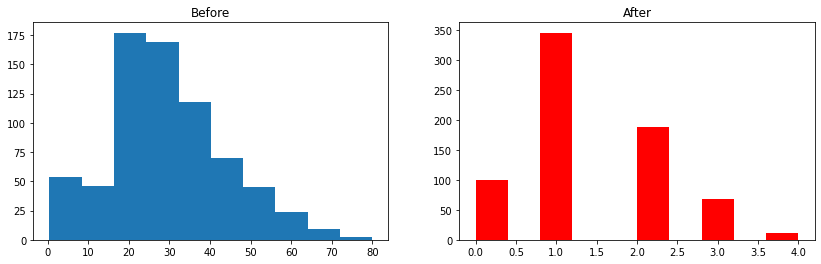

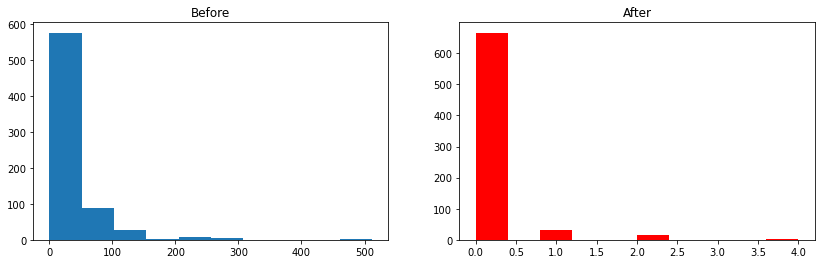

In [55]:
discretize(5,'ordinal','uniform')